# Exploratory Data Analysis on Loan Data

- Our aim for this project is to find which loanees are likely to default
- Which parameters are the most important in deciding our above analysis

In [1]:
# importing useful libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'axes.grid' : False})

### Data Sourcing and Preparation

In [2]:
# importing the data set

data = pd.read_csv('loan.csv', encoding = "latin")

In [3]:
# lets see the head of the data

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# lets see the shape of our data set

data.shape

(39717, 111)

So we have 39717 rows and 111 columns, quite a lot!

#### Great, now lets gather some more information on our data set to get to what we are dealing with

In [5]:
#let us know the general info of the dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [6]:
# let us look for null values

data.isnull().any()

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                      True
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

In [7]:
# let us know the total number of null values in each column

data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

- Quite a lot missing values in some of the columns like tot_hi_cred_lim

In [8]:
# let us look at some minor stats

data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
# Lets see which columns have 100% missing values

columns = data.columns

percent_missing = round(100*(data.isnull().sum()/len(data.index)), 2)

missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})

print(missing_value_df)

                                           column_name  percent_missing
id                                                  id              0.0
member_id                                    member_id              0.0
loan_amnt                                    loan_amnt              0.0
funded_amnt                                funded_amnt              0.0
funded_amnt_inv                        funded_amnt_inv              0.0
...                                                ...              ...
tax_liens                                    tax_liens              0.1
tot_hi_cred_lim                        tot_hi_cred_lim            100.0
total_bal_ex_mort                    total_bal_ex_mort            100.0
total_bc_limit                          total_bc_limit            100.0
total_il_high_credit_limit  total_il_high_credit_limit            100.0

[111 rows x 2 columns]


We see that there are quite a few columns that have 100% missing values, we do not need them so let us drop those

In [10]:
# dropping columns having 100% missing values

missing_drop = list(missing_value_df[missing_value_df.percent_missing == 100.00].column_name)

data = data.drop(missing_drop, axis = 1)

In [11]:
# let us check the shape of the data set now

data.shape

(39717, 57)

Whoa! A total of 54 columns had 100% missing values

In [12]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### The columns 'title', 'desc', 'url', 'emp_title', 'zip_code' are just additional info on the customer,  we have no use of them lets drop them

In [13]:
# dropping the above said columns

data = data.drop(['title', 'desc', 'url', 'emp_title', 'zip_code'], axis = 1)

In [14]:
# check the shape of the data set again

data.shape

(39717, 52)

#### These columns are more about loan parameters which are of no real use to us in our analysis, we will drop them, 
'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'collection_recovery_fee', 'recoveries',  'total_rec_late_fee', 'total_rec_int', 'total_rec_prncp', 'total_pymnt_inv', 'out_prncp', 'out_prncp_inv'

In [15]:
# dropping the columns

data = data.drop(['last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'collection_recovery_fee', 'recoveries', 
                    'total_rec_late_fee', 'total_rec_int', 'total_rec_prncp', 'total_pymnt_inv', 'out_prncp', 
                      'out_prncp_inv'], axis = 1)

In [16]:
data.shape

(39717, 41)

In [17]:
# Customer behavior attributes and certain other fields that we would not be using for analysis. Hence removing the same.

data = data.drop(['delinq_2yrs', 'total_acc', 'pub_rec', 'inq_last_6mths', 'earliest_cr_line', 'collections_12_mths_ex_med',
                  'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',  'tax_liens', 'installment', 
                  'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util', 'total_pymnt', 'next_pymnt_d',
                  'initial_list_status', 'pub_rec_bankruptcies', 'policy_code', 'application_type', 'pymnt_plan', 'open_acc'], 
                 axis = 1)

In [18]:
data.shape

(39717, 18)

In [19]:
# checking for duplicate values by checking if the loan id is repeated

true_count = data['id'].duplicated().sum()
print(true_count)

0


No duplicate values, good to go

In [20]:
# lets drop the loan id column, we have no real use of it for our analysis

data = data.drop(['id', 'member_id'], axis = 1)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [21]:
data.shape

(39717, 16)

In [22]:
# Since we would only be analysing the scenario where there are more chances that a loan applicant will default, we can ignore
# the loans that are currently running and instead take the fully paid up loans and charged off (defaulted) loans for analysis.

data = data[data.loan_status != 'Current']

In [23]:
# Check how many rows have null values

round(100*(data.isnull().sum()/len(data.index)), 2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

In [24]:
# We will remove the null rows from emp_length field as it is less than 5%

data = data.dropna(subset=['emp_length'])

In [25]:
# Let us check the types of purposes for which the loan has taken as this is one of the factor 
# which we will use in our analysis

(data.purpose.value_counts()*100)/len(data)

debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: purpose, dtype: float64

In [26]:
# We do not know what 'other' signifies, better to drop it

data.drop(data[data.purpose == 'other'].index, inplace=True)

In [27]:
# the term column is object data type since it has months, let us make it int by dropping months

data['term'] = data['term'].str.replace('months', '')
data['term'] = data['term'].astype(int)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96%,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [28]:
# We should remove the % sign from rate column and convert its data type to float, since it hs decimal values

data['int_rate'] = data['int_rate'].str.replace('%', '')
data['int_rate'] = data['int_rate'].astype(float)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [29]:
# We need to clean up the emp_length column and convert it ino int
# We will treat 0 and <1 year as 0 because they all fall under less than 1 year category
# We will treat 10+ years as 10 which would mean 10 years and above

data['emp_length'] = data['emp_length'].str.replace('years', '')
data['emp_length'] = data['emp_length'].str.replace('< 1 year', '0')
data['emp_length'] = data['emp_length'].str.strip('+ ')
data['emp_length'] = data['emp_length'].str.replace('year', '')
data['emp_length'] = data['emp_length'].astype(int)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [30]:
# now lets check the annuaL_inc (annual income) column

data['annual_inc'].describe()

count    3.383100e+04
mean     7.003334e+04
std      6.596019e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [31]:
# There is a huge difference between the mean and the max values in the annual_inc column. Hence we need to remove the outliers 
# We will remove any value which is outside the 99.9% quartile

nn_quartile = data['annual_inc'].quantile(0.99)
data = data[data["annual_inc"] < nn_quartile]
data["annual_inc"].describe()

count     33492.000000
mean      66490.324304
std       35165.906151
min        4000.000000
25%       42000.000000
50%       60000.000000
75%       82000.000000
max      235000.000000
Name: annual_inc, dtype: float64

A bit better now, this makes sense

### Derived Metrics :

In [32]:
# Let us extract Year and month from Issue_Date and put them into seperate columns

data['issue_month'],data['issue_year'] = data['issue_d'].str.split('-', 1).str
data['issue_year'] = '20'+ data['issue_year']
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011


In [33]:
# we need to create a new column for loan to income ratio

data['loan_inc_ratio']= 100*(data['loan_amnt']/data['annual_inc'])
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350


In [34]:
# Lets us get the 25%, 50% and 75% quartiles of the loan_inc_ratio column for categorisation

data['loan_inc_ratio'].quantile([.25, .5, .75])

0.25    10.285714
0.50    16.666667
0.75    25.384615
Name: loan_inc_ratio, dtype: float64

In [35]:
# We need to categorise the int_rate column into categorised_int_rate_perc (percentage) column as follows :
# < 9% is Low
# Between 9% and 11% (both inclusive) is Medium
# 12% and 13% are High
# >= 14% is Very High

def interest_rates(n):
    if n < 9:
        return 'Low'
    elif n >=9 and n < 12:
        return 'Medium'
    elif n >= 12 and n < 14:
        return 'High'
    else:
        return 'Very High'
    
data['categorised_int_rate_perc'] = data['int_rate'].apply(interest_rates)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_int_rate_perc
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,Medium
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333,Very High
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,Very High
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Very High


In [36]:
# Let us get the 25%, 50% and 75% quartiles of the emp_length column for categorisation

data['emp_length'].quantile([.25, .5, .75])

0.25    2.0
0.50    4.0
0.75    9.0
Name: emp_length, dtype: float64

In [37]:
# We need to categorise the emp_length column into categorised_emp_length column as follows :
# < 9 is Entry Level
# Between 2 and 4 (both inclusive) is Junior Level
# Between 4 and 8 (noth inclusive) is Middle Level
# >= 9 is Senior Level

def emp_length_category(n):
    if n < 2:
        return 'Entry Level'
    elif n >=2 and n < 4:
        return 'Junior Level'
    elif n >= 4 and n < 9:
        return 'Middle Level'
    else:
        return 'Senior Level'
    
data['categorised_emp_length'] = data['emp_length'].apply(emp_length_category)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,Medium,Senior Level
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333,Very High,Entry Level
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,Very High,Senior Level
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Low,Junior Level
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Very High,Middle Level


In [38]:
# Let us get the 25%, 50% and 75% quartiles of the annual_inc column for categorisation

data['annual_inc'].quantile([.25, .5, .75])

0.25    42000.0
0.50    60000.0
0.75    82000.0
Name: annual_inc, dtype: float64

In [39]:
# We need to categorise the annual_in column into categorised_annual_inc column as follows :
# < 41000 is low
# Between 41000 and 59000 (both inclusive) is Medium
# Between 60000 and 82000 (both inclusive) is High
# >= 83000 is Very High

def annual_income_category(n):
    if n < 41000:
        return 'Low'
    elif n >=41000 and n < 60000:
        return 'Medium'
    elif n >= 60000 and n < 83000:
        return 'High'
    else:
        return 'Very High'
    
data['categorised_annual_inc'] = data['annual_inc'].apply(annual_income_category)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,Medium,Senior Level,Low
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Dec,2011,8.333333,Very High,Entry Level,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,Very High,Senior Level,Low
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Low,Junior Level,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Very High,Middle Level,Medium


In [40]:
# Let us get the 25%, 50% and 75% quartiles of the dti( debt to income ratio) column for categorisation

data['dti'].quantile([.25, .5, .75])

0.25     8.4075
0.50    13.5400
0.75    18.6500
Name: dti, dtype: float64

In [41]:
# Categorise the dti column into categorised_dti column as follows :
# < 8 is Low
# Between 8 and 12 (both inclusive) is Medium
# Between 13 and 18 (noth inclusive) is High
# >= 19 is Very High

def dti_category(n):
    if n < 8:
        return 'Low'
    elif n >=8 and n < 13:
        return 'Medium'
    elif n >= 13 and n < 19:
        return 'High'
    else:
        return 'Very High'
    
data['categorised_dti'] = data['dti'].apply(dti_category)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,credit_card,AZ,27.65,Dec,2011,20.833333,Medium,Senior Level,Low,Very High
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,car,GA,1.00,Dec,2011,8.333333,Very High,Entry Level,Low,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,small_business,IL,8.72,Dec,2011,19.588639,Very High,Senior Level,Low,Medium
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,wedding,AZ,11.20,Dec,2011,13.888889,Low,Junior Level,Low,Medium
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,debt_consolidation,NC,23.51,Dec,2011,14.892350,Very High,Middle Level,Medium,Very High


In [42]:
# Let us get the 25%, 50% and 75% quartiles of the loan_amnt column for categorisation

data['loan_amnt'].quantile([.25, .5, .75])

0.25     6000.0
0.50    10000.0
0.75    15000.0
Name: loan_amnt, dtype: float64

In [43]:
# We need to categorise the loan_amnt column into categorised_loan_amnt column as follows :
# < 5400 is Low
# Between 5400 and 9599 (both inclusive) is Medium
# Between 9600 and 14999 (noth inclusive) is High
# >= 15000 is Very High

def loan_amount_category(n):
    if n < 5400:
        return 'Low'
    elif n >=5400 and n < 9600:
        return 'Medium'
    elif n >= 9600 and n < 15000:
        return 'High'
    else:
        return 'Very High'
    
data['categorised_loan_amnt'] = data['loan_amnt'].apply(loan_amount_category)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti,categorised_loan_amnt
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,AZ,27.65,Dec,2011,20.833333,Medium,Senior Level,Low,Very High,Low
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,GA,1.00,Dec,2011,8.333333,Very High,Entry Level,Low,Low,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,IL,8.72,Dec,2011,19.588639,Very High,Senior Level,Low,Medium,Low
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,AZ,11.20,Dec,2011,13.888889,Low,Junior Level,Low,Medium,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,NC,23.51,Dec,2011,14.892350,Very High,Middle Level,Medium,Very High,Medium


In [44]:
# Let us have a final look at the shape of our data set

data.shape

(33492, 24)

So we have 24 columns and 33492 rows to analyse! Onto the next step. 

- (Should we use Machine Learning on this dataset? Problem statement could be to find which factors decide whether a person will default or not?)

#### Whew!! That was quite a lot and very tedious. We will now start the good part :p. Let us get our hands dirty with beautiful charts, plots and what not! 

# Data Analysis
### 1. Univariate Analysis

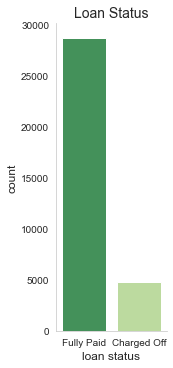

In [45]:
plot = sns.catplot(x="loan_status", kind="count", data=data, palette="YlGn_r", aspect= .5);

plt.title('Loan Status', fontsize = 14)
plt.xlabel("loan status", fontsize = 12)
plt.ylabel("count", fontsize = 12)

plt.show()

The above graph shows that around 5000 people have defaulted/charged off.

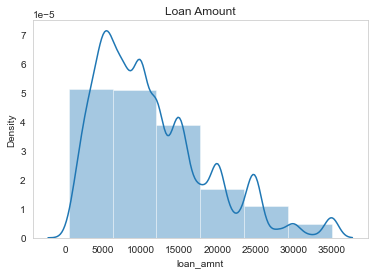

In [46]:
# let us see the distribution of loan amount 

plt.title('Loan Amount')
sns.distplot(data['loan_amnt'], bins=6)
plt.show()

The graph above shows that the loan amount is majorly spread around say 6000 to 18000 approximately



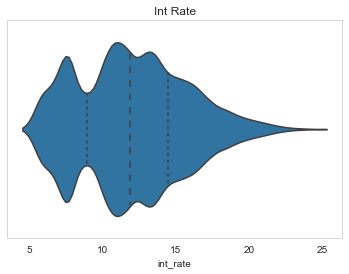

In [47]:
# let us see the distribution of interest rate

plt.title('Int Rate')
sns.violinplot(data['int_rate'], inner='quartile')
plt.show()

The above graph shows that the interest rate is spread majorly between 8% and 14% approximately

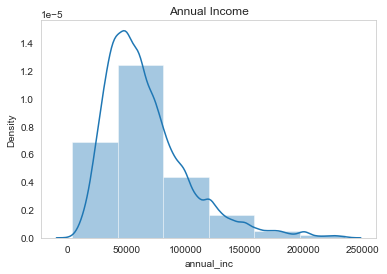

In [48]:
# let us see the distribution of Annual Income

plt.title('Annual Income')
sns.distplot(data['annual_inc'],bins = 6)
plt.show()

As per the above graph, majority of the applicants have an annual income ranging approximately between 40000 USD to 90000 USD.



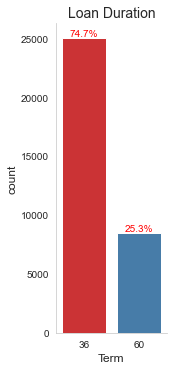

In [49]:
# let us analyse the loan duration

plot = sns.catplot(x="term", kind="count", data=data, palette="Set1", aspect= .5);

plt.title('Loan Duration', fontsize = 14)
plt.xlabel("Term", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

# copied from github

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x() + p.get_width()/2., p.get_height()), color='red', ha='center', va='bottom')
  
plt.show()

As per the above graph, majority of the applicants have taken the loan duration as 36 months (74.7%)



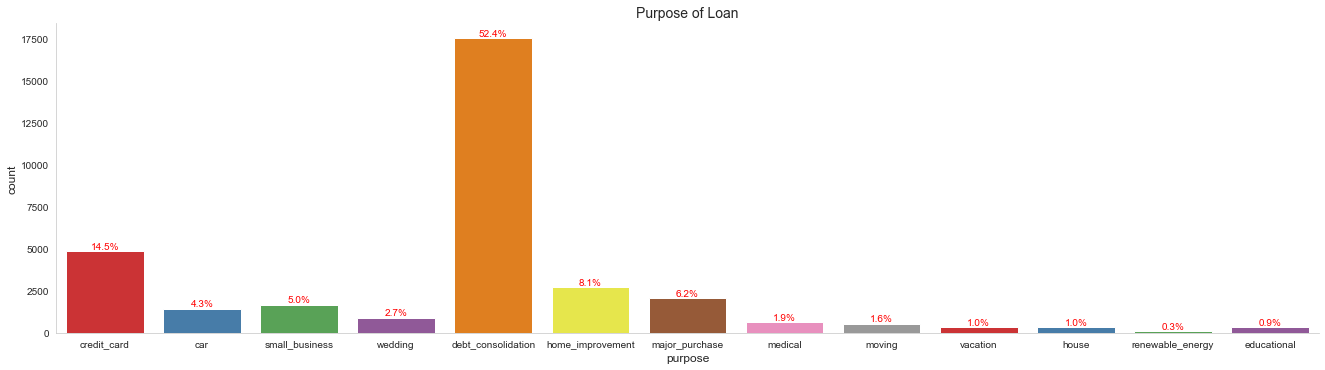

In [50]:
# Let us see the purposes and its spread for which the applicants have applied for loan

plot = sns.catplot(x="purpose", kind="count", data=data, palette="Set1", aspect= 3.7);

plt.title('Purpose of Loan', fontsize = 14)
plt.xlabel("purpose", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

The following are the purposes for which more than 5% applicants have taken loan

- debt_consolidation - 52.4%
- credit_card        - 14.5%
- home_improvement   -  8.1%
- major_purchase     -  6.2%
- small business     -  5.0%

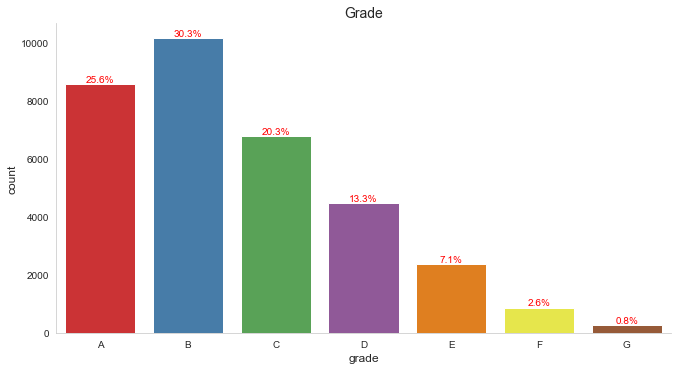

In [51]:
# Let us see how the loan application is spread across the grades

order_grade = ['A','B','C','D','E','F','G']
plot = sns.catplot(x="grade", kind="count", data=data, palette="Set1", aspect= 1.9, order=order_grade);

plt.title('Grade', fontsize = 14)
plt.xlabel("grade", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

The above graph shows that most of the applicants fall under the grade B(30.3%), followed by A(25.6%) and C(20.3%)



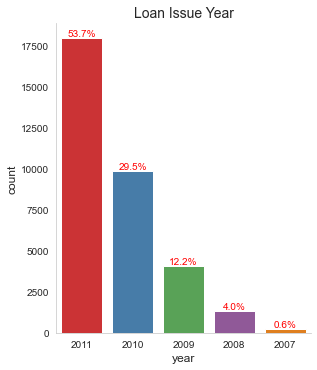

In [52]:
# Based on Year

plot = sns.catplot(x="issue_year", kind="count", data=data, palette="Set1", aspect= .9);

plt.title('Loan Issue Year', fontsize = 14)
plt.xlabel("year", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

Per the above graph, applicants for loan increased as the years increased. In 2011 the number of applicants for loan was 53.7%. Since the variable issue year does not provide us any direction in the analysis, we would not be using this variable for any further analysis.

#### Segmented Univariate Analysis - Let us see how the data is spread based on segmented columns

In [53]:
# Various order categories which would be frequently used for ordering

order_category = ['Low','Medium','High','Very High']
order_emp_category = ['Entry Level', 'Junior Level', 'Middle Level', 'Senior Level']
order_grade = ['A','B','C','D','E','F','G']
filtered_purpose_df = data[(data['purpose']=='debt_consolidation')
                           |(data['purpose']=='credit_card')
                           |(data['purpose']=='home_improvement')
                           |(data['purpose']=='major_purchase')
                           |(data['purpose']=='small_business')]

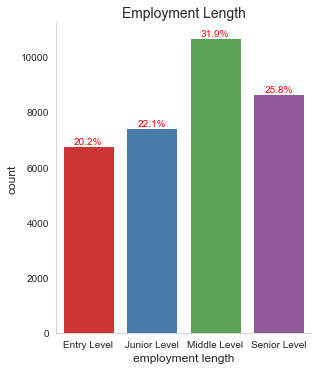

In [55]:
# Employment Length

plot = sns.catplot(x="categorised_emp_length", kind="count", data=data, palette="Set1", aspect= 0.9, order = order_emp_category);

plt.title('Employment Length', fontsize = 14)
plt.xlabel("employment length", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

There are more number of loan applicants belonging to the middle level catgory (31.9%) i.e. between 4 to 8 years



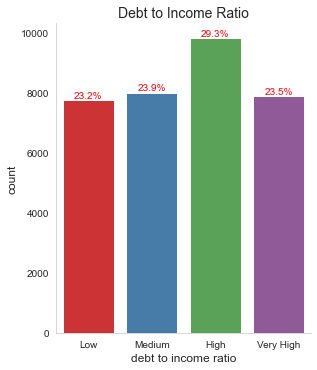

In [57]:
# debt to income ratio

plot = sns.catplot(x="categorised_dti", kind="count", data=data, palette="Set1", aspect= .9, order=order_category);

plt.title('Debt to Income Ratio', fontsize = 14)
plt.xlabel("debt to income ratio", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
